In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load data
df = pd.read_csv("cleaned_used.car_data.csv")

In [3]:
# IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['price'] >= lower) & (df['price'] <= upper)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (3765, 14)


In [4]:
# Features and target
X = df.drop(columns='price')
y = df['price']

In [5]:
# Identify columns
categorical = X.select_dtypes(include='object').columns.tolist()
numeric = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric),
    ("cat", categorical_transformer, categorical)
])


In [7]:

# Full pipeline with model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [8]:

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)


In [9]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# Cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average CV R² Score: {cv_scores.mean():.2f}")


Model Evaluation:
RMSE: 9072.90
R² Score: 0.81
Cross-Validation R² Scores: [0.82319251 0.8274162  0.81297264 0.8247941  0.83940835]
Average CV R² Score: 0.83


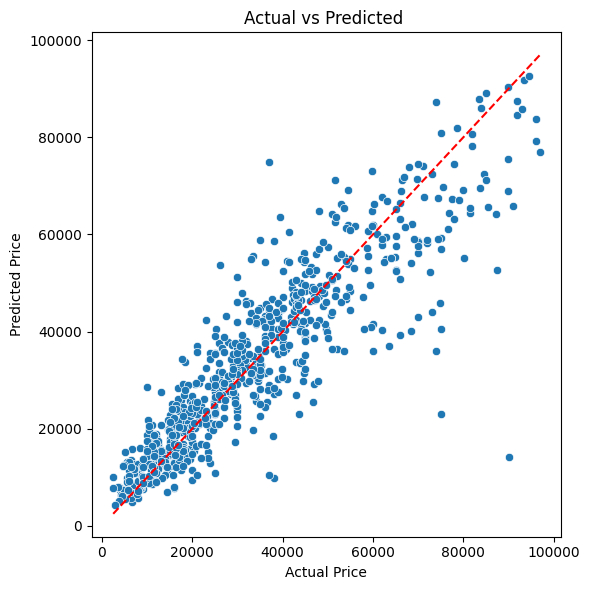

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)  # Change to best model
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted ")
plt.tight_layout()
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression

# Update pipeline with Linear Regression
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred1 = model_pipeline.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Performance:
RMSE: 10777.02
R² Score: 0.74


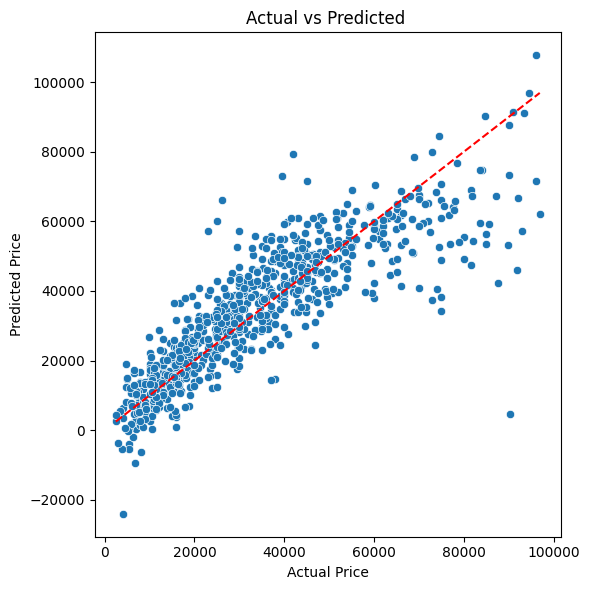

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred1)  # Change to best model
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted ")
plt.tight_layout()
plt.show()


In [24]:
from sklearn.tree import DecisionTreeRegressor